In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


----
- **Dependent Feature** : Salary
- **Independent Feature** : YearsExperienece
- **Supervised Learning** : Labelled Data
- **Regression Problem** : Target column is continuous numerical

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
# Check for duplicates
df.duplicated().sum()

0

In [5]:
# Check for missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

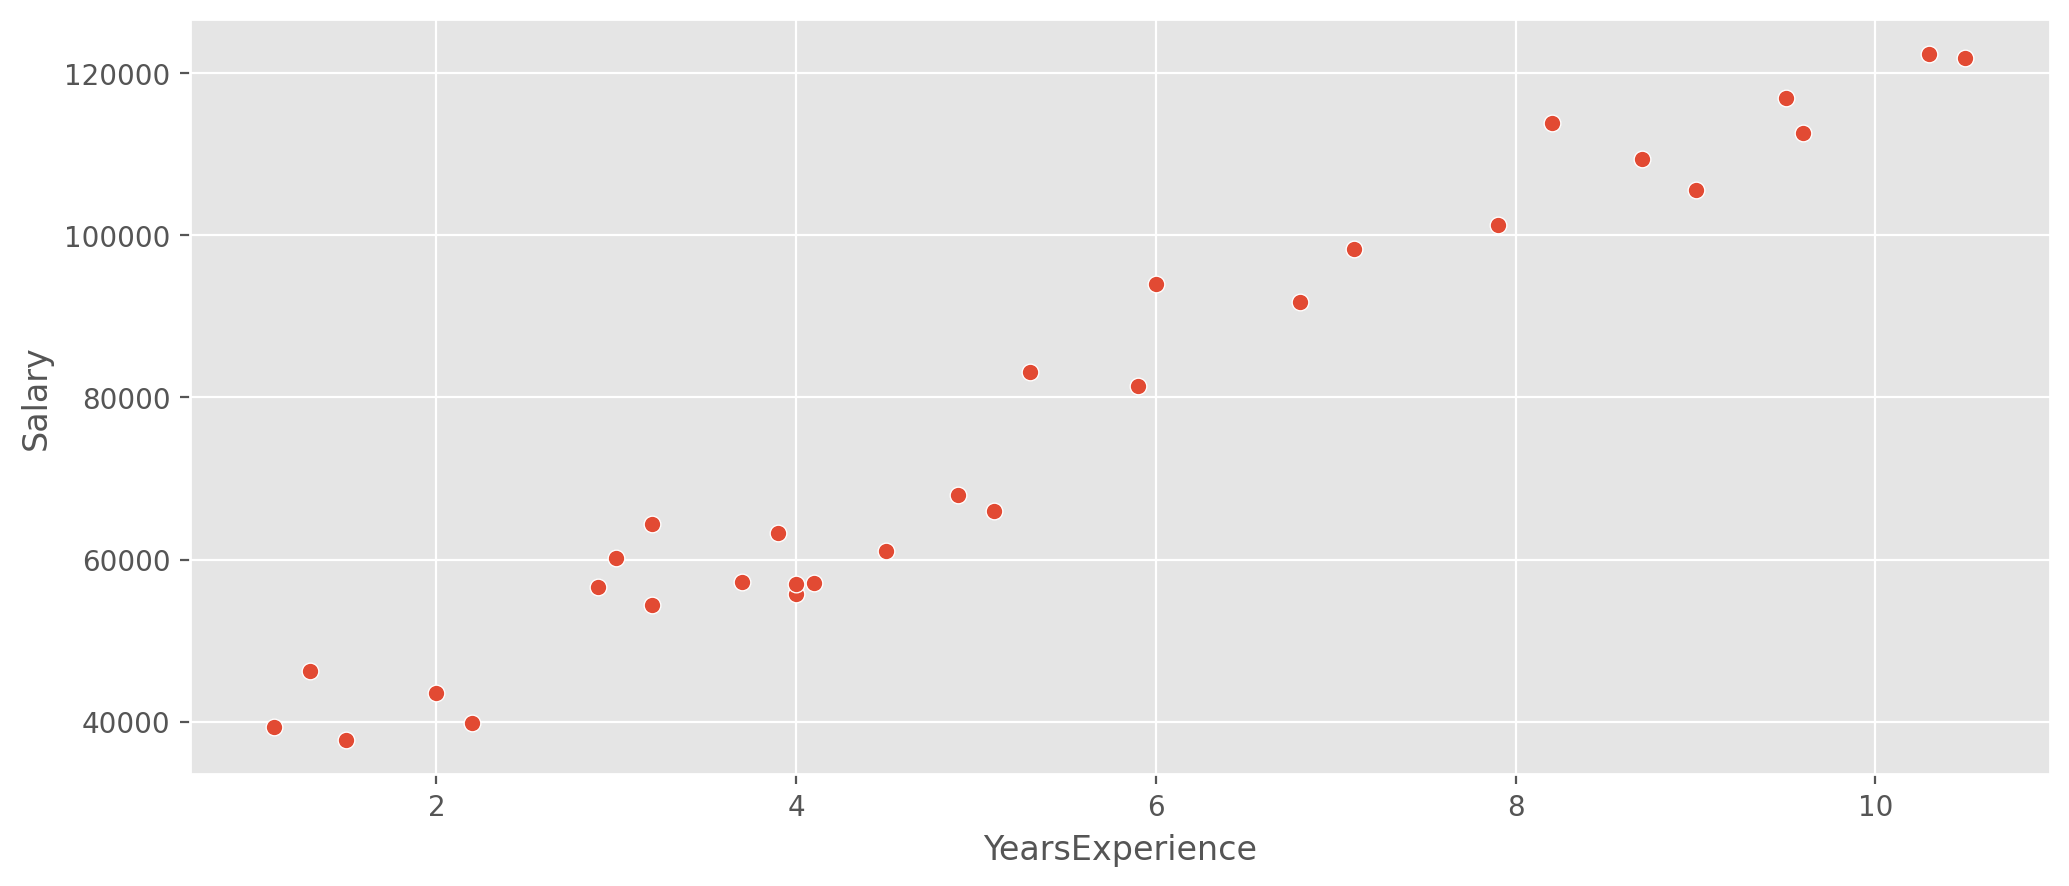

In [6]:
# Checking the relationship between YearsExperience and Salary
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('YearsExperience', 'Salary', data = df)

---
- Only one independent feature
- Relationship between dependent and independent feature is linear
- Simple Linear Regression is suitable algorithm

<AxesSubplot:ylabel='YearsExperience'>

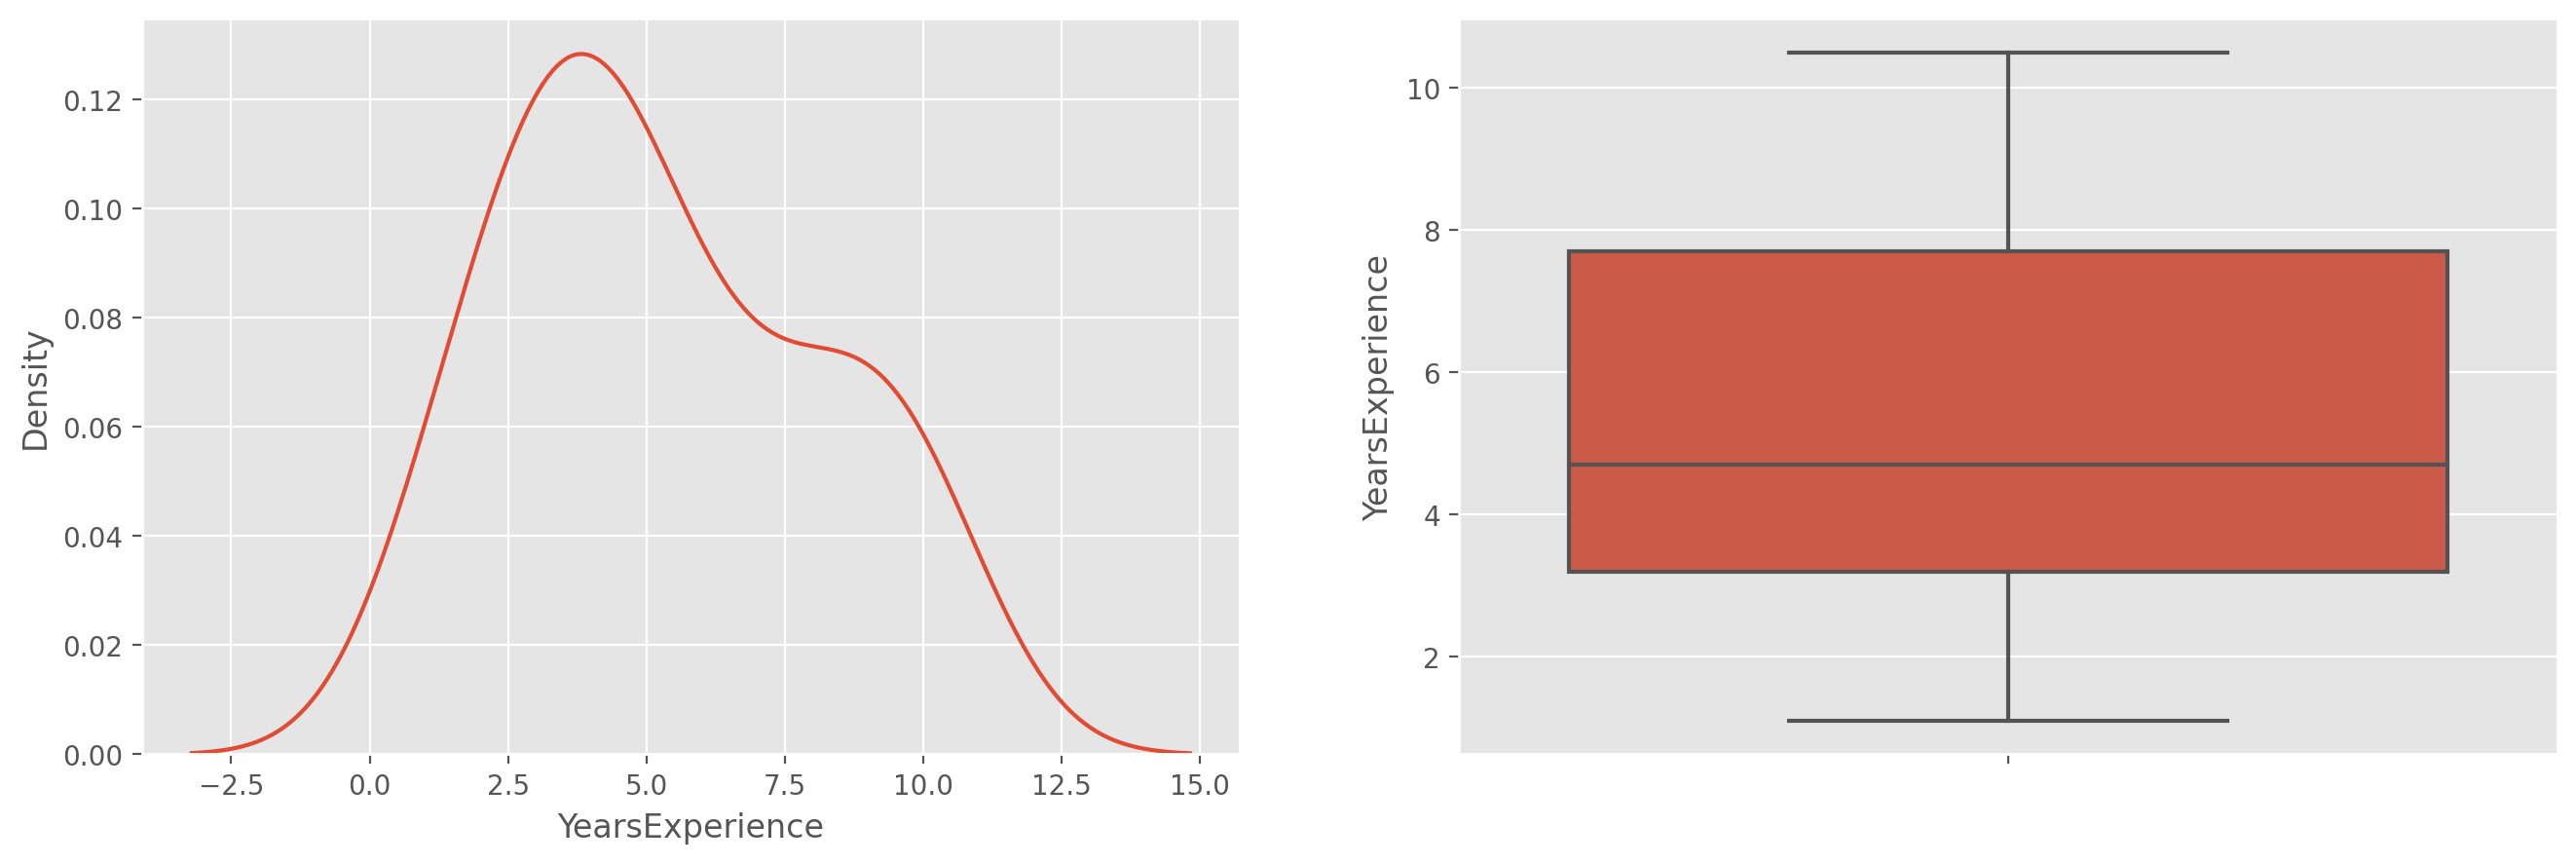

In [9]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['YearsExperience'])

<AxesSubplot:ylabel='Salary'>

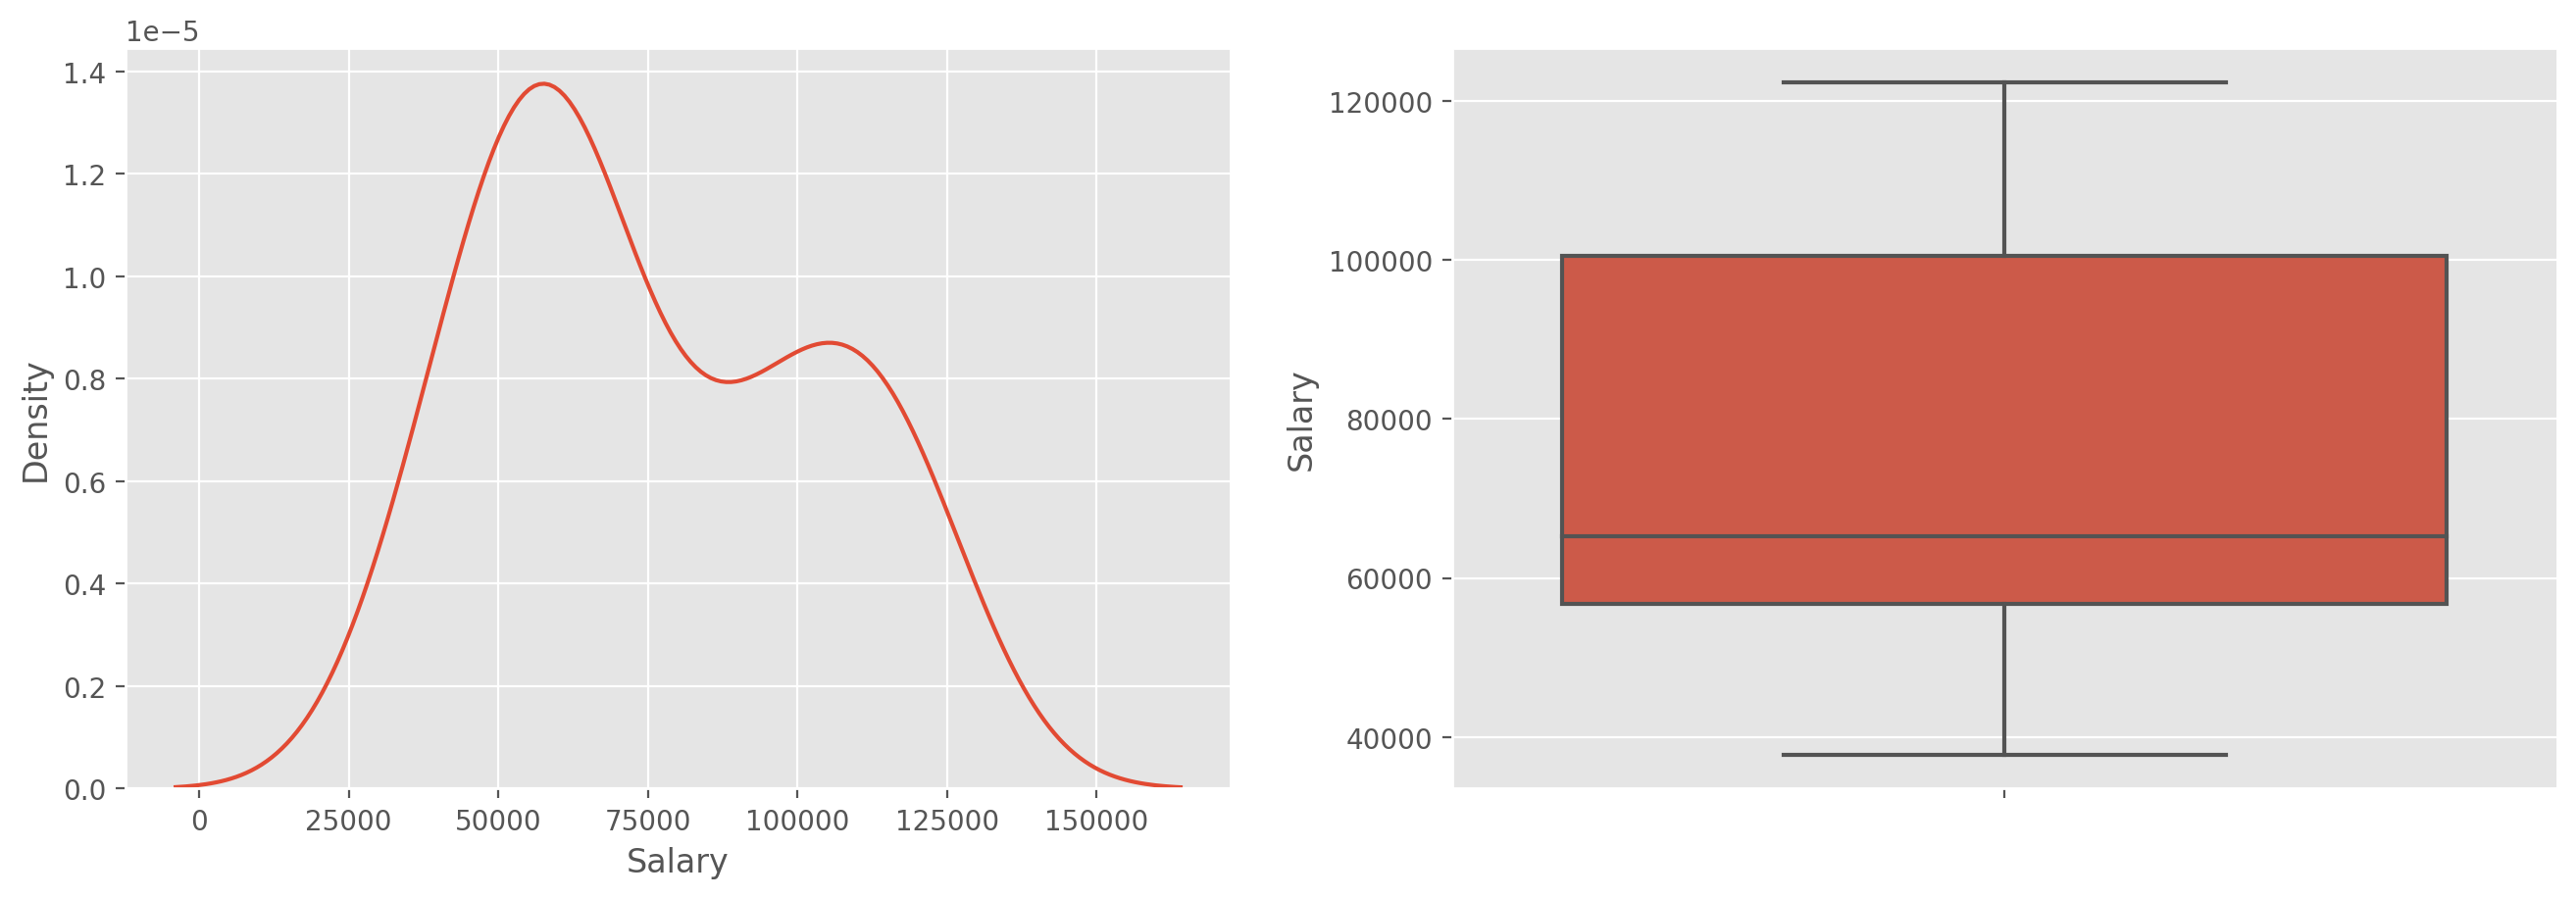

In [10]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['Salary'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['Salary'])

In [11]:
X = df[['YearsExperience']].values
Y = df[['Salary']].values

In [12]:
print('Independent feature shape : ', X.shape)
print('Dependent feature Shape   : ', Y.shape)

Independent feature shape :  (30, 1)
Dependent feature Shape   :  (30, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [14]:
print('Training Data shape   : ', x_train.shape)
print('Training Labels shape : ', y_train.shape)
print('Testing Data shape    : ', x_test.shape)
print('Testing Labels shape  : ', y_test.shape)

Training Data shape   :  (22, 1)
Training Labels shape :  (22, 1)
Testing Data shape    :  (8, 1)
Testing Labels shape  :  (8, 1)


----
## Training the model

In [16]:
# Ordinary Least Squares (OLS)
from sklearn.linear_model import LinearRegression             # Import the class
regressor = LinearRegression()                                # Create an object
regressor.fit(x_train, y_train)                               # Fit the object to trainig data

LinearRegression()

In [17]:
regressor.intercept_                  # B0

array([27048.91343091])

In [18]:
regressor.coef_                      # B1

array([[9337.14073482]])

---
- **Y' = B0 + B1*X**
- **Y' = 27048.91 + 9337.14*X**

In [21]:
regressor.predict([[10]])

array([[120420.32077908]])

In [22]:
27048.91 + 9337.14*10

120420.31

In [25]:
regressor.predict([[10],[20],[25],[15]])

array([[120420.32077908],
       [213791.72812725],
       [260477.43180133],
       [213791.72812725]])

In [26]:
regressor.predict(x_test[:10])

array([[ 64397.47637018],
       [125088.89114649],
       [103613.46745641],
       [111083.18004426],
       [ 82138.04376633],
       [ 63463.7622967 ],
       [ 41054.62453314],
       [ 65331.19044366]])

In [27]:
# Evaluation
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.9560748883996936
Testing Set Score  :  0.9556640405326781


----
## Visualizing the model fit

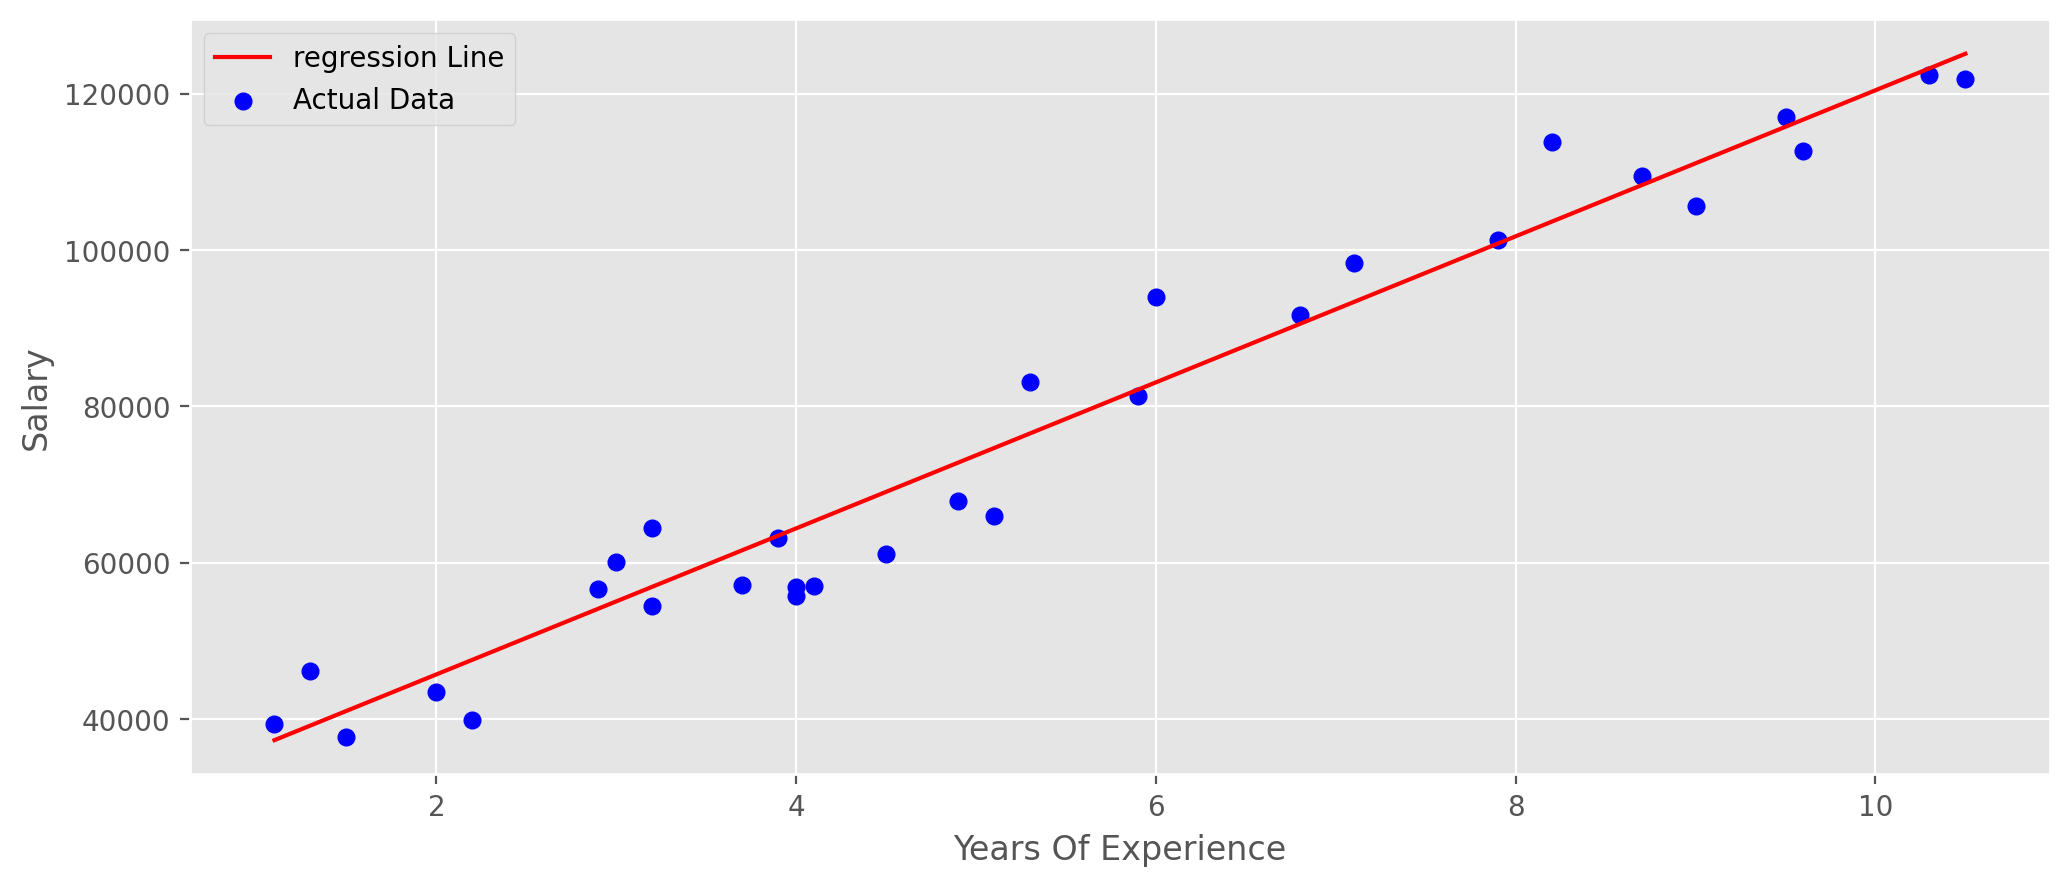

In [32]:
pred = regressor.predict(X)

plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
plt.plot(X, pred, color = 'red', label = 'regression Line')

plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.legend()

In [35]:
compare = pd.DataFrame({'Actual Salary' : Y.ravel(), 'Predicted Salary' : pred.ravel()})
compare

,Actual Salary,Predicted Salary
0,39343,37319.768239
1,46205,39187.196386
2,37731,41054.624533
3,43525,45723.194901
4,39891,47590.623048
5,56642,54126.621562
6,60150,55060.335635
7,54445,56927.763782
8,64445,56927.763782
9,57189,61596.334150


---------
# ================================================
## Stochastic Gradient Descent

In [62]:
# Gradient Descent method
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(alpha = 0.001)                    # generally 0.001, 0.01, 0.1
sgd_regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

In [63]:
sgd_regressor.intercept_              # B0

array([22666.96749131])

In [64]:
sgd_regressor.coef_                   # B1

array([9996.1429603])

In [65]:
# Evaluation
print('Training Set Score : ', sgd_regressor.score(x_train, y_train))
print('Testing Set Score  : ', sgd_regressor.score(x_test, y_test))

Training Set Score :  0.9497848091743764
Testing Set Score  :  0.961406942387133


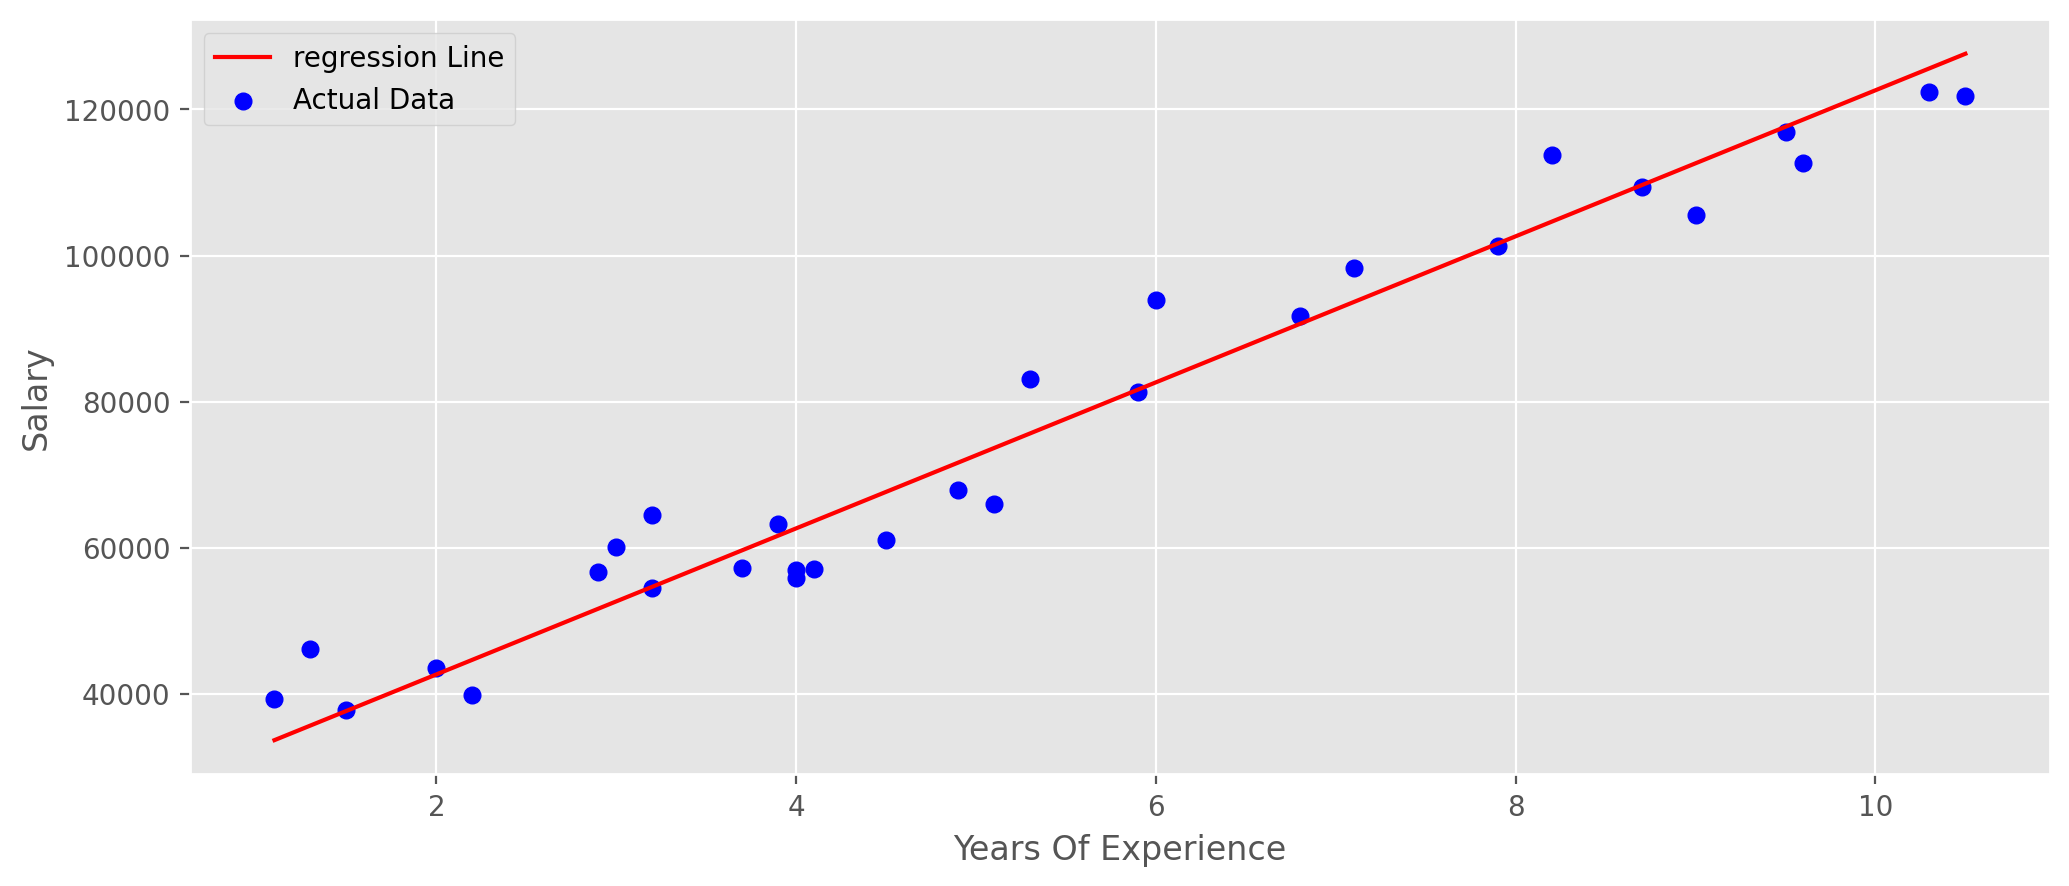

In [66]:
pred = sgd_regressor.predict(X)

plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
plt.plot(X, pred, color = 'red', label = 'regression Line')

plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.legend()